# Fast.ai2 Vision Tutorial (Beginner)
This is not NLP related, but I wanted to go through the tutorial to understand fast.ai library

Make sure to run the first line of code before installing fastai2; I only realized that the notebook was running on CPU on Kaggle, making some trainings that was supposingly under a minute to be 30 min.

Important links:

https://dev.fast.ai/tutorial.vision

https://forums.fast.ai/t/major-new-changes-and-features/40742/14


In [1]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0 MB 6.3 kB/s  eta 0:00:01    |█▋                              | 35.7 MB 10.8 MB/s eta 0:01:03     |██                              | 44.2 MB 10.8 MB/s eta 0:01:02     |██                              | 45.5 MB 26.6 MB/s eta 0:00:25     |██▏                             | 48.1 MB 26.6 MB/s eta 0:00:25     |███                             | 66.7 MB 26.6 MB/s eta 0:00:25                       | 68.5 MB 26.6 MB/s eta 0:00:25 MB 26.6 MB/s eta 0:00:24     |███▍                            | 74.3 MB 26.6 MB/s eta 0:00:24     |███▍                            | 75.7 MB 26.6 MB/s eta 0:00:24     |███▌                            | 77.3 MB 26.6 MB/s eta 0:00:24     |████████████████████████▏       | 534.4 MB 50.1 MB/s eta 0:00:04     |████████████████████████▏       | 535.6 MB 50.1 MB/s eta 0:00:04     |████████████████████████▎       | 536.9 MB 34.3 MB/s eta 0:00:05     |███████████████

In [2]:
!pip install fastai2

     |████████████████████████████████| 176 kB 2.9 MB/s eta 0:00:01
  Attempting uninstall: fastprogress
    Found existing installation: fastprogress 0.2.3
    Uninstalling fastprogress-0.2.3:
      Successfully uninstalled fastprogress-0.2.3
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from fastai2.vision.all import *

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
files = get_image_files(path/"images")
len(files)

7390

In [7]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'))

### Single-label classification (Cat vs Dog)

In [8]:
def label_func(f): return f[0].isupper()

In [9]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

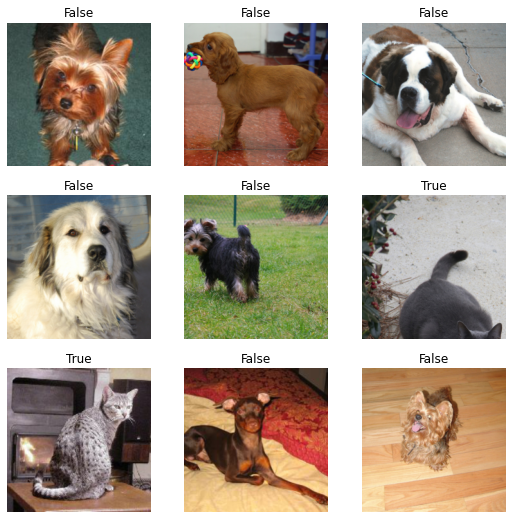

In [10]:
dls.show_batch()

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


/opt/conda/lib/python3.7/site-packages/fastai2/callback/schedule.py:68: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx = (pos >= pcts).nonzero().max()


The first line downloaded a model called ResNet34, pretrained on ImageNet, and adapted it to our specific problem. It then fine tuned that model.

In [13]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 1.1954e-06]))

The predict method returns three things: the decoded prediction (here False for dog), the index of the predicted class and the tensor of probabilities that our image is one of a dog (here the model is quite confident!) This method accepts a filename, a PIL image or a tensor directly in this case.

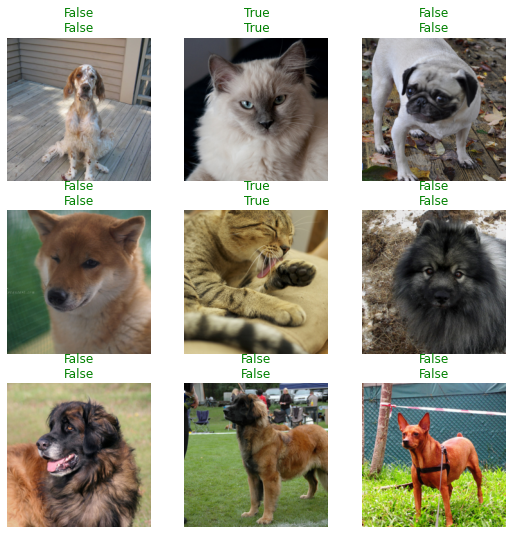

In [12]:
learn.show_results()

### Classifying breeds

In [14]:
files[0].name

'beagle_115.jpg'

In [15]:
pat = r'^(.*)_\d+.jpg'

In [16]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

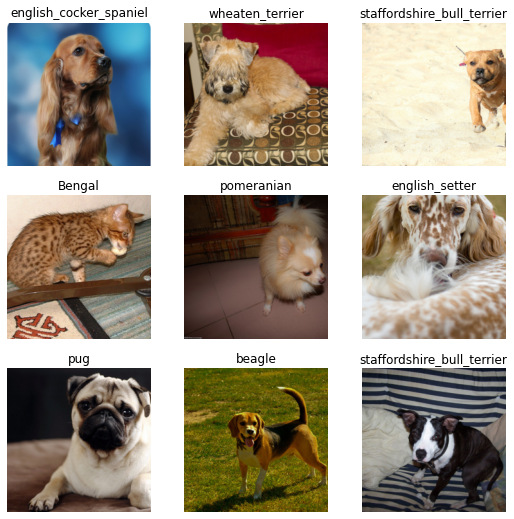

In [17]:
dls.show_batch()

In [18]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

This time we resized to a larger size before batching, and we add batch_tfms. aug_transforms is a function that provides a collection of data augmentation transforms with defaults we found worked very well on most datasets (you can customize each one by passing the right arguments).

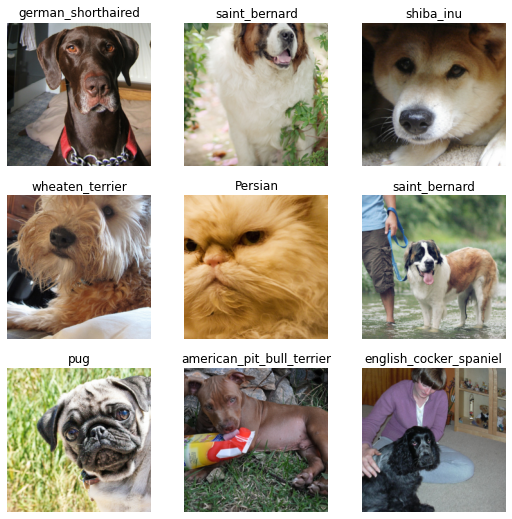

In [19]:
dls.show_batch()

In [20]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

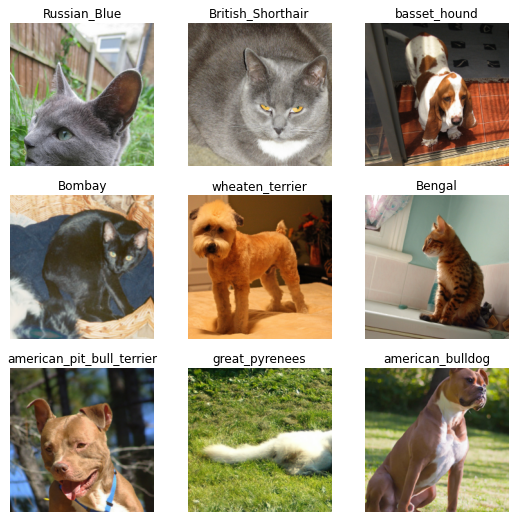

In [21]:
dls.show_batch()

In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.005248074419796467)

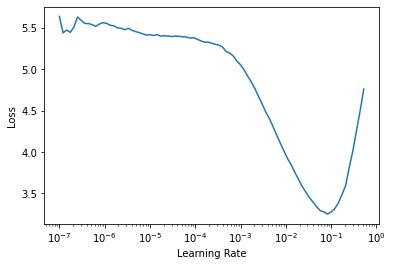

In [23]:
learn.lr_find()

In [24]:
learn.fine_tune(4, 5e-3)

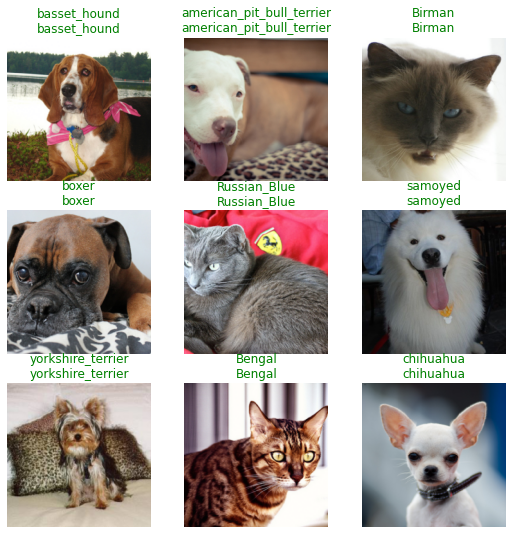

In [25]:
learn.show_results()

In [26]:
interp = Interpretation.from_learner(learn)

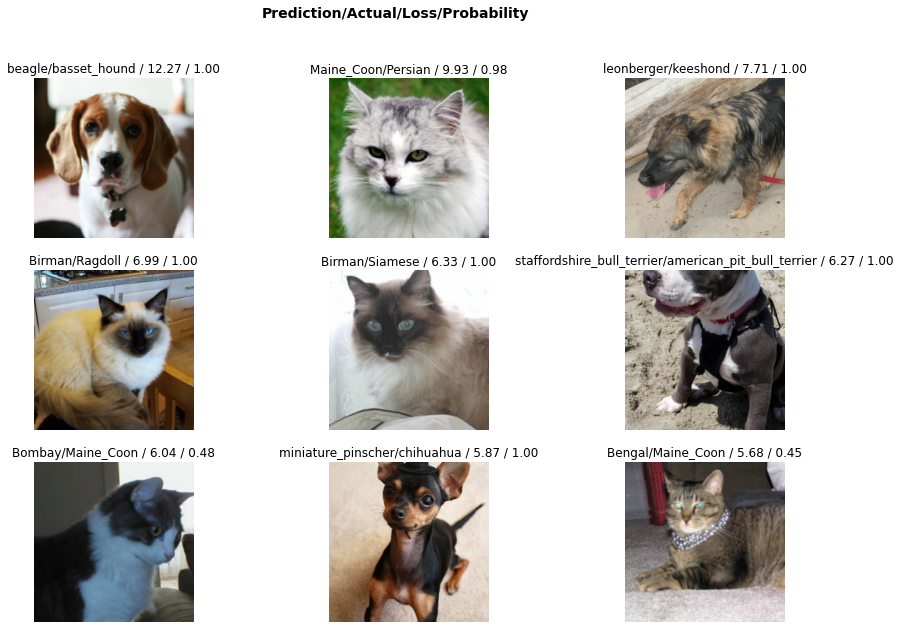

In [27]:
interp.plot_top_losses(9, figsize=(15,10))

### Data Block API

A datablock is built by giving the fastai library a bunch of informations:

the types used, through an argument called blocks: here we have images and categories, so we pass ImageBlock and CategoryBlock.
how to get the raw items, here our function get_image_files.
how to label those items, here with the same regular expression as before.
how to split those items, here with a random splitter.
the item_tfms and batch_tfms like before.

In [28]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

The pets object by itself is empty: it only containes the functions that will help us gather the data. We have to call dataloaders method to get a DataLoaders. We pass it the source of the data:

In [29]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

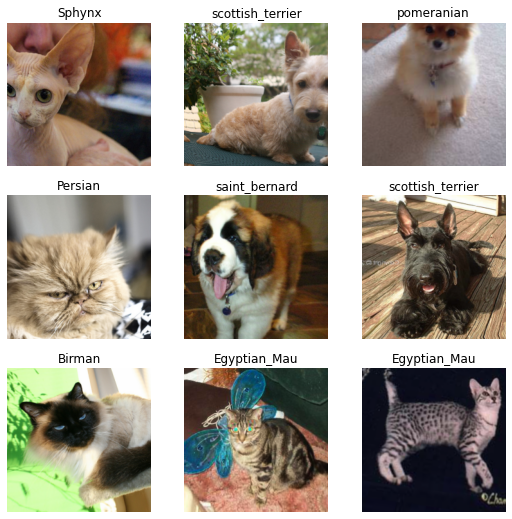

In [30]:
dls.show_batch(max_n=9)

## Multilabel Classification

In [31]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [32]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [33]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

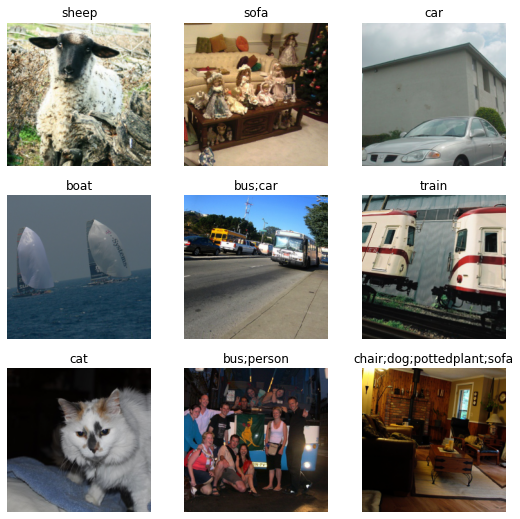

In [34]:
dls.show_batch()

Training is similar as before the only difference is in the metric we pass: error_rate will not work for a multi-label problem, but we can use accuracy_thresh.

In [35]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.03981071710586548)

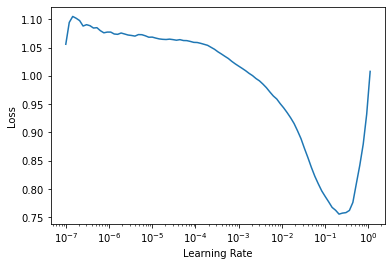

In [36]:
learn.lr_find()

In [37]:
learn.fine_tune(4, 2e-2)

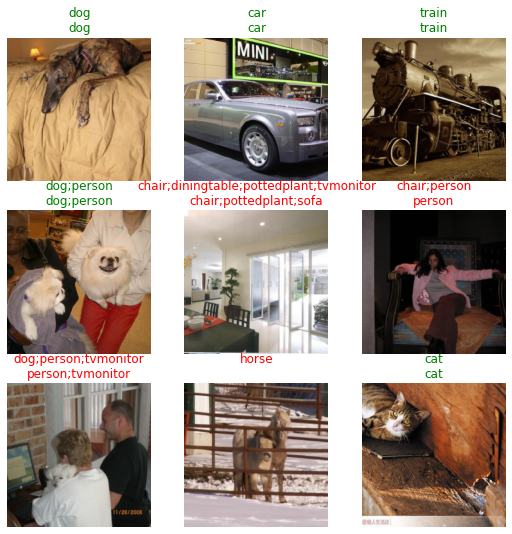

In [38]:
learn.show_results()

In [39]:
learn.predict(path/'train/000005.jpg')

((#2) ['chair','diningtable'],
 tensor([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False, False, False, False]),
 tensor([2.3385e-04, 6.3534e-03, 2.0057e-04, 3.6578e-04, 4.2161e-02, 5.8661e-04,
         4.6777e-04, 3.7386e-03, 9.8565e-01, 3.9894e-04, 7.3564e-01, 2.3018e-03,
         1.8655e-05, 3.7172e-04, 1.4416e-01, 6.7561e-02, 4.1009e-05, 4.1898e-01,
         3.0284e-03, 2.9944e-01]))

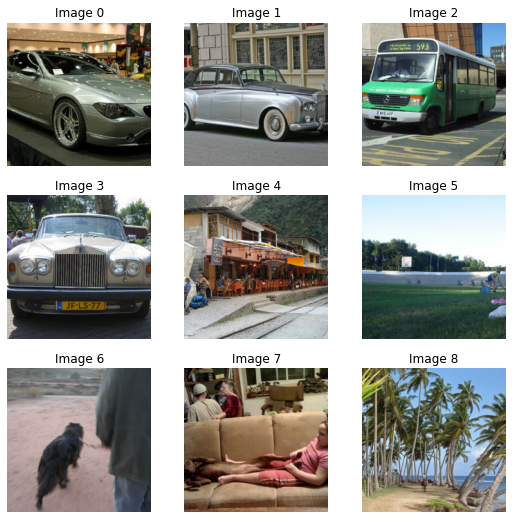

In [40]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

with Data Block API

In [41]:
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In this case we build the data block by providing:

- the types used: ImageBlock and MultiCategoryBlock.
- how to get the input items from our dataframe: here we read the column fname and need to add path/train/ at the beginning to get proper filenames.
- how to get the targets from our dataframe: here we read the column labels and need to split by space.
- how to split the items, here by using the column is_valid.
- the item_tfms and batch_tfms like before.

In [42]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [43]:
dls = pascal.dataloaders(df)

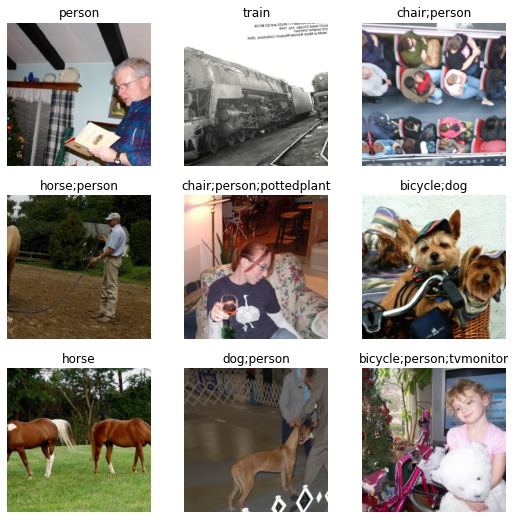

In [44]:
dls.show_batch(max_n=9)

## Segmentation

Segmentation is a problem where we have to predict a category for each pixel of the image.

In [45]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [46]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [47]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0001TP_006750.png')

In [48]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04950_P.png')

In [49]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [50]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

We do not need to pass item_tfms to resize our images here because they already are all of the same size.

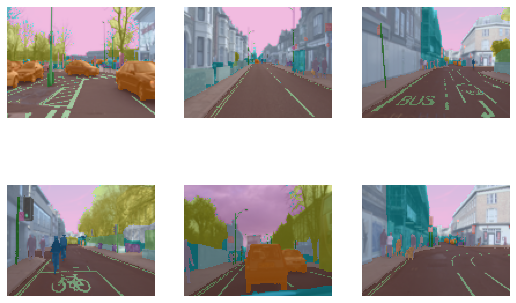

In [51]:
dls.show_batch(max_n=6)

A traditional CNN won't work for segmentation, we have to use a special kind of model called a UNet, so we use unet_learner to define our Learner:

In [52]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

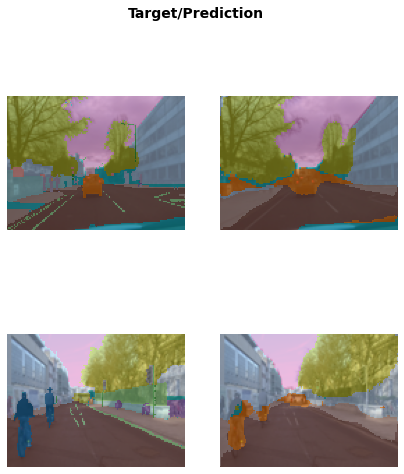

In [53]:
learn.show_results(max_n=6, figsize=(7,8))

In this case we build the data block by providing:

- the types used: ImageBlock and MaskBlock. We provide the codes to MaskBlock as there is no way to guess them from the data.
- how to gather our items, here by using get_image_files.
- how to get the targets from our items: by using label_func.
- how to split the items, here randomly.
- batch_tfms for data augmentation.

In [54]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(),
                   batch_tfms=aug_transforms(size=(120,160)))

In [55]:
dls = camvid.dataloaders(path/"images", path=path, bs=8)

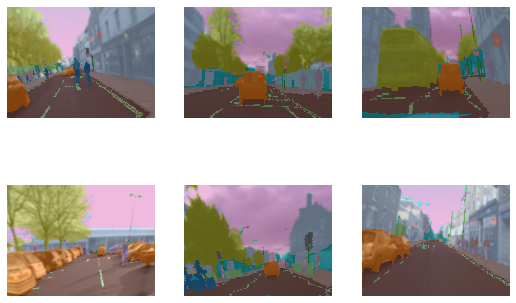

In [57]:
dls.show_batch(max_n=6)

## Predict Points in a Picture

In [58]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [59]:
path.ls()

(#50) [Path('/root/.fastai/data/biwi_head_pose/04.obj'),Path('/root/.fastai/data/biwi_head_pose/15.obj'),Path('/root/.fastai/data/biwi_head_pose/10.obj'),Path('/root/.fastai/data/biwi_head_pose/20.obj'),Path('/root/.fastai/data/biwi_head_pose/18.obj'),Path('/root/.fastai/data/biwi_head_pose/22'),Path('/root/.fastai/data/biwi_head_pose/01'),Path('/root/.fastai/data/biwi_head_pose/03.obj'),Path('/root/.fastai/data/biwi_head_pose/07.obj'),Path('/root/.fastai/data/biwi_head_pose/23')...]

In [60]:
(path/'01').ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00118_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00163_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00211_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00239_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00041_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00357_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00131_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00316_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00058_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00292_pose.txt')...]

In [61]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/22/frame_00163_pose.txt')

In [62]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

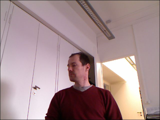

In [63]:
im.to_thumb(160)

In [64]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [65]:
get_ctr(img_files[0])

tensor([311.6877, 268.2660])

We can pass this function to DataBlock as get_y, since it is responsible for labeling each item. We'll resize the images to half their input size, just to speed up training a bit.

One important point to note is that we should not just use a random splitter. The reason for this is that the same person appears in multiple images in this dataset — but we want to ensure that our model can generalise to people that it hasn't seen yet. Each folder in the dataset contains the images for one person. Therefore, we can create a splitter function which returns true for just one person, resulting in a validation set containing just that person's images.

The only other difference to previous data block examples is that the second block is a PointBlock. This is necessary so that fastai knows that the labels represent coordinates; that way, it knows that when doing data augmentation, it should do the same augmentation to these coordinates as it does to the images.

In [66]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

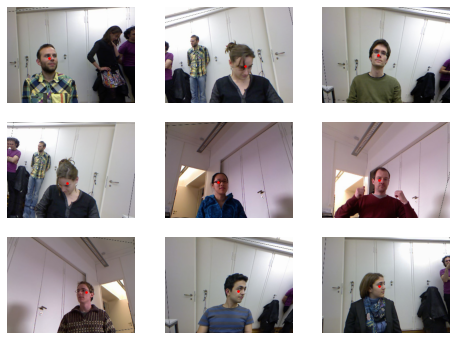

In [67]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

In [68]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.03981071710586548)

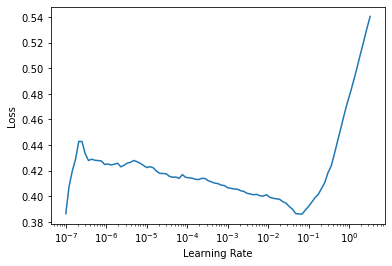

In [69]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 7e-3)

In [ ]:
math.sqrt(0.0001)

In [ ]:
learn.show_results()